In [1]:
# Supervised Classification
import pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Data
data = pandas.read_csv('./data/james_river_data.txt',
                       comment="#",
                       sep='\t',
                       dtype={"discharge_cfs": int, "flow_rate_ft": float}
                      )
data = data.drop(index=0) # Drop the one time record with metadata under the headers
data['datetime'] = pandas.to_datetime(data['datetime'])
data = data.rename(columns = {"147077_00060": "discharge_cfs", 
                              "147077_00060_cd": "discharge_read_type",
                              "147078_00065": "flow_rate_ft",
                              "147078_00065_cd": "flow_rate_read_type"})

# Clean data
print(f"Before filtering we have {len(data.index)} records")
data = data.dropna()
print(f"After filtering we have {len(data.index)} records")

data = data.loc[data['flow_rate_read_type'] == 'A'] # Remove 'P' == predicted values from the future
data = data.loc[data['discharge_read_type'] == 'A'] # Remove 'P' == predicted values from the future

# Convert types
data = data.convert_dtypes()
data = data.astype({"discharge_cfs": int, "flow_rate_ft": float})

/Users/brianskarda/Library/Caches/pypoetry/virtualenvs/model-CDSBhTbK-py3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (1,4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Before filtering we have 382942 records
After filtering we have 381670 records


In [3]:
# Flood Categories (in feet)
# Major Flood Stage:	22
# Moderate Flood Stage:	15
# Flood Stage:	12
# Action Stage:	9

In [4]:
# Derive some new variables
data["month"] = data["datetime"].dt.month
data["day"] = data["datetime"].dt.day

data.loc[data["flow_rate_ft"] > 0, "stage"] = 0
data.loc[data["flow_rate_ft"] > 9, "stage"] = 1
data.loc[data["flow_rate_ft"] > 12, "stage"] = 2
data.loc[data["flow_rate_ft"] > 15, "stage"] = 3
data.loc[data["flow_rate_ft"] > 22, "stage"] = 4

supervised_classification_data = data[["month", "day", "stage"]]

train_input, test_input, train_output, test_output = train_test_split(supervised_classification_data[["month", "day"]],
                                                                      supervised_classification_data["stage"])

In [5]:
train_input.head()

,month,day
312708,6,13
277330,5,31
244721,6,25
20697,2,2
351128,7,17


In [6]:
train_output.head()

312708    0.0
277330    0.0
244721    0.0
20697     0.0
351128    0.0
Name: stage, dtype: float64

In [7]:
knn = KNeighborsClassifier()
knn_model = knn.fit(train_input, train_output)

knn_score = knn_model.score(test_input, test_output)
print(f"accuracty {knn_score}")

accuracty 0.9253375610482747


<BarContainer object of 93983 artists>

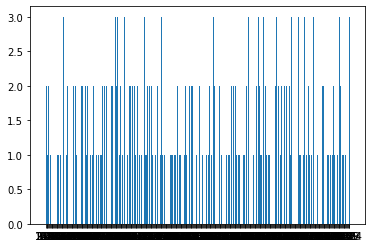

In [8]:
plt.bar(test_input["month"].astype(str) + "-" + test_input["day"].astype(str), test_output)